In [1]:
### Project Main Code File
### ICMF 324 - Mahidol University International College
### Logan Harris, Jannis Thiemann, [Everyone Enter Their Name Here]

Source: https://www.kaggle.com/datasets/darrylljk/worlds-best-universities-qs-rankings-2025

QS Documentation: https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings

# Variables

2025_Rank: QS World University Rankings in 2025.

2024_Rank: QS World University Rankings in 2024.

Institution_Name: Name of the institution.

Location: 2-letter country code (ISO 3166-1 alpha-2).

Location_Full: Full country name.

Size: Student body size category based on FTE; XL (>30,000), L (>=12,000), M (>=5,000), S (<5,000)

Academic_Reputation: Composite score (0-100) from a global academic survey of experts that weighs domestic and international nominations over five years

Employer Reputation: Composite score (0–100) derived from global employer surveys that combine international and domestic weighted counts over five years

Faculty Student: Ratio of full-time equivalent (FTE) academic staff to FTE students, indicating the academic resource availability per student

Citations per Faculty: Average citation count per faculty member, adjusted for paper-type exclusions, self-citations, and faculty area normalization, based on a six-year citation window from Scopus

International Faculty: Proportion of international faculty staff (determined by citizenship) among overall faculty staff

International Students: Proportion of international students (foreign nationals studying for at least three months) among the overall student body

International Research Network: Composite measure of the diversity and strength of sustained international research partnerships, normalized across faculty areas using joint publication data.

Employment Outcomes: Composite measure of an institution's success in producing highly employable graduates and impactful alumni

Sustainability: Composite measure of an institution's commitment to environmental, social, and governance initiatives—including campus projects, diversity, and SDG-focused research

QS Overall Score: Composite score combining the weighted indicators across lenses (Research and Discovery, Employability and Outcomes, Global Engagement, Learning Experience, and Sustainability)

In [5]:
# import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import pycountry
from itertools import combinations
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# load data
df = pd.read_csv('qs-world-rankings-2025.csv', encoding='UTF-8-SIG')

df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


# Data Cleaning and Feature Engineering

In [8]:
# Drop the redundant columns and assign to df1
df1 = df.drop(columns=["QS Overall Score", "Location Full", "2025 Rank", "2024 Rank"])

# Create a mapping dictionary for renaming the indicators
rename_dict = {
    "Academic Reputation": "AR",
    "Citations per Faculty": "CPF",
    "Employer Reputation": "ER",
    "Employment Outcomes": "EO",
    "International Faculty": "IFR",
    "International Research Network": "IRN",
    "International Students": "ISR",
    "Faculty Student": "FSR",
    "Sustainability": "SUS",
    "Institution Name": "Name"
}

# Rename the columns in df1
df1 = df1.rename(columns=rename_dict)

# Display the first few rows of df1 to verify the changes
df1.head()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
0,Massachusetts Institute of Technology (MIT),US,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0
1,Imperial College London,UK,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7
2,University of Oxford,UK,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0
3,Harvard University,US,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4
4,University of Cambridge,UK,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8


In [10]:
df1.tail()

,Name,Location,Size,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
1498,University of Montana Missoula,US,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0
1499,University of Oradea,RO,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3
1500,University of San Carlos,PH,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0
1501,"University Politehnica of Timisoara, UPT",RO,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1
1502,Western Washington University,US,L,2.6,2.6,7.3,3.5,9.7,1.6,12.4,1.5,1.1


In [12]:
df1.shape

(1503, 12)

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      1503 non-null   object 
 1   Location  1503 non-null   object 
 2   Size      1503 non-null   object 
 3   AR        1503 non-null   float64
 4   ER        1503 non-null   float64
 5   FSR       1503 non-null   float64
 6   CPF       1503 non-null   float64
 7   IFR       1403 non-null   float64
 8   ISR       1445 non-null   float64
 9   IRN       1502 non-null   float64
 10  EO        1503 non-null   float64
 11  SUS       1484 non-null   float64
dtypes: float64(9), object(3)
memory usage: 141.0+ KB


In [16]:
# Missing Value Analysis

In [18]:
missing_counts = df1.isnull().sum()
missing_percent = (df1.isnull().sum() / len(df)) * 100
print("Missing values percentage per column:\n", missing_percent)

Missing values percentage per column:
 Name        0.000000
Location    0.000000
Size        0.000000
AR          0.000000
ER          0.000000
FSR         0.000000
CPF         0.000000
IFR         6.653360
ISR         3.858949
IRN         0.066534
EO          0.000000
SUS         1.264138
dtype: float64


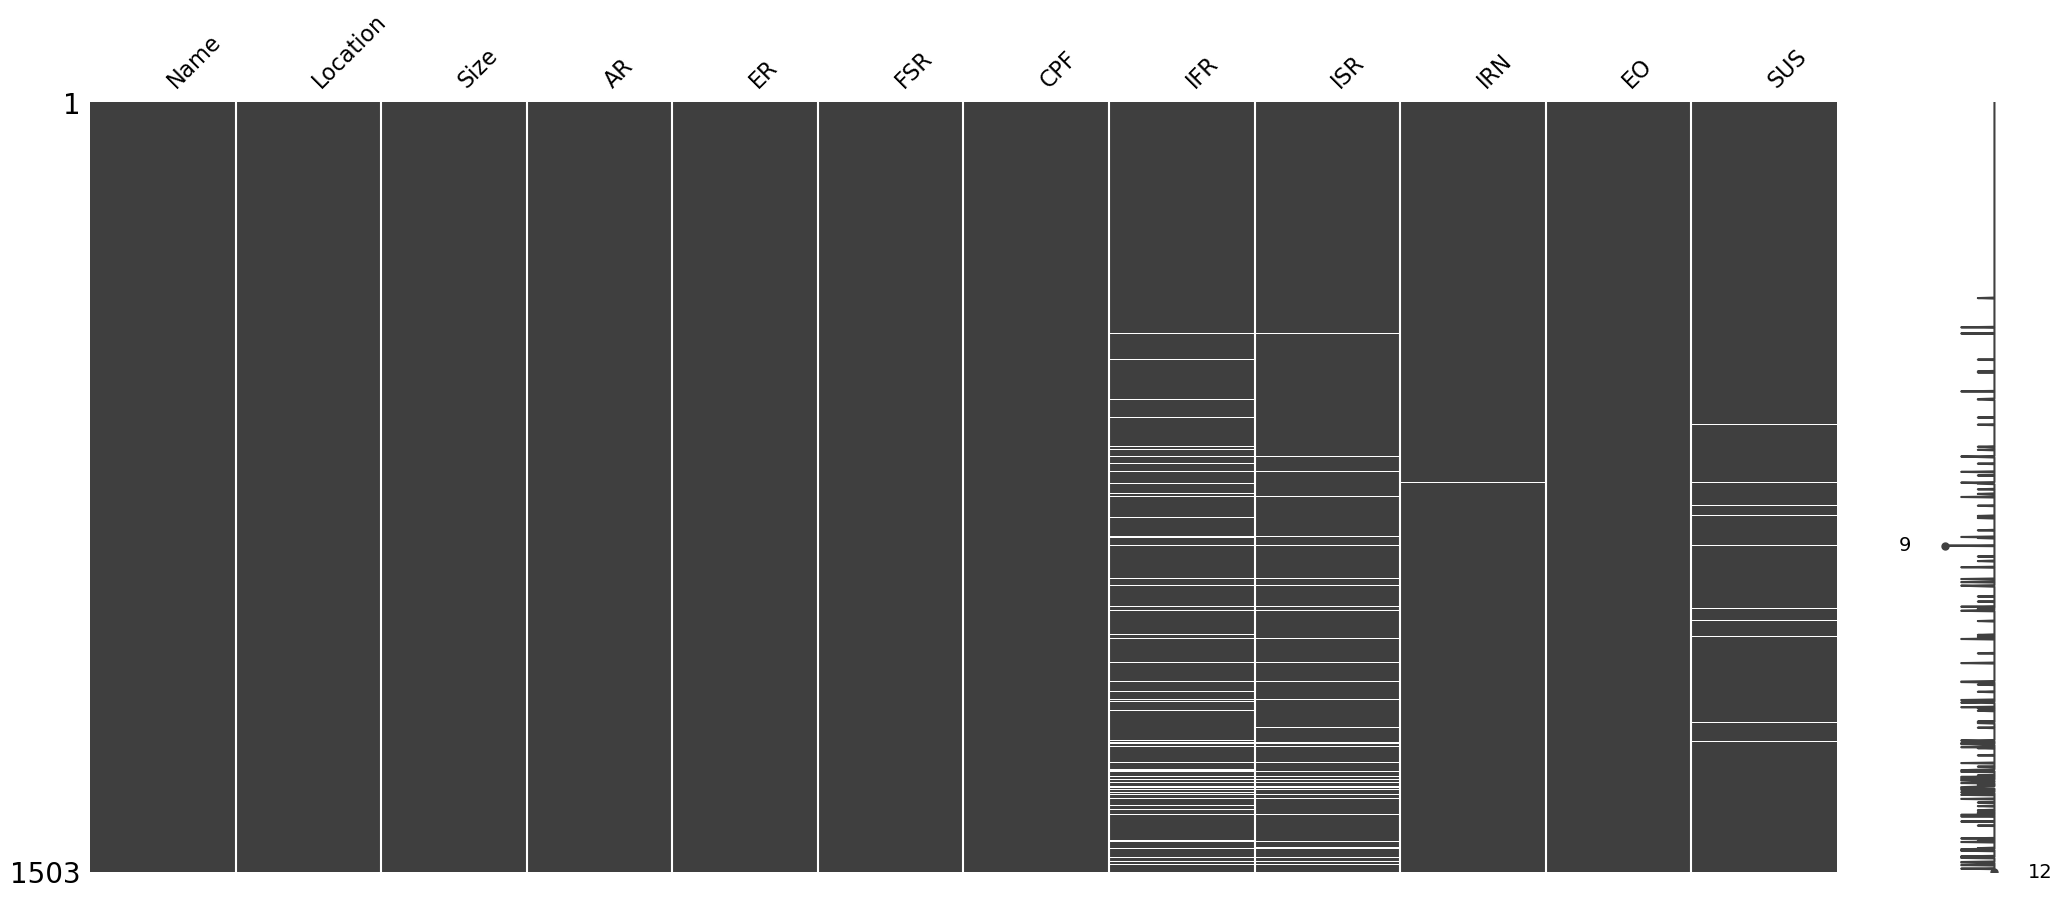

In [20]:
import missingno as msno
import matplotlib.pyplot as plt

# Visualize the missing data matrix
msno.matrix(df1)
plt.savefig("missing_data_matrix.pdf", dpi=1200, bbox_inches='tight')
plt.show()

In [22]:
columns_to_impute = ['IFR', 'ISR', 'IRN', 'SUS']

# Impute with median
df1[columns_to_impute] = df1[columns_to_impute].fillna(df1[columns_to_impute].median())

missing_counts = df1.isnull().sum()
print("Missing values per column:\n", missing_counts)

Missing values per column:
 Name        0
Location    0
Size        0
AR          0
ER          0
FSR         0
CPF         0
IFR         0
ISR         0
IRN         0
EO          0
SUS         0
dtype: int64


In [24]:
df1.describe().round(2)

,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS
count,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00,1503.00
mean,20.29,19.79,28.13,23.50,29.51,24.96,50.13,23.83,24.09
std,22.33,23.78,27.61,27.87,33.48,30.65,29.86,27.35,30.94
min,1.30,1.10,1.00,1.00,1.00,1.00,1.00,1.20,1.00
25%,6.30,4.30,7.30,2.80,4.60,3.10,22.75,4.00,1.30
50%,11.00,9.40,16.00,9.90,12.50,9.60,51.10,11.80,6.75
75%,23.50,25.30,40.40,36.40,46.55,36.95,77.10,33.40,39.50
max,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00


In [26]:
df1.describe(include='object')

,Name,Location,Size
count,1503,1503,1503
unique,1503,106,4
top,Massachusetts Institute of Technology (MIT),US,L
freq,1,197,691


In [28]:
# Define the size order from smallest to largest
size_order = ['S', 'M', 'L', 'XL']

# Convert to ordered category and encode as integers
df1['SZ'] = df1['Size'].astype(
    pd.CategoricalDtype(categories=size_order, ordered=True)
).cat.codes

In [30]:
df['Location'].value_counts()

Location
US     197
UK      90
CN      71
JP      49
DE      48
      ... 
NCY      1
IS       1
CY       1
LU       1
HN       1
Name: count, Length: 106, dtype: int64

In [32]:
# Define the size order from smallest to largest
size_order = ['S', 'M', 'L', 'XL']

# Convert to ordered category and encode as integers
df1['SZ'] = df1['Size'].astype(
    pd.CategoricalDtype(categories=size_order, ordered=True)
).cat.codes

In [34]:
# Step 1: Count country frequencies
country_counts = df1['Location'].value_counts(normalize=True).cumsum()

print(country_counts)

# Step 2: Choose countries that cover 80% of the data
top_countries = country_counts[country_counts <= 0.8].index.tolist()

len(top_countries)

Location
US     0.131071
UK     0.190951
CN     0.238190
JP     0.270792
DE     0.302728
         ...   
NCY    0.997339
IS     0.998004
CY     0.998669
LU     0.999335
HN     1.000000
Name: proportion, Length: 106, dtype: float64


33

In [36]:
# --- Load World Bank classification ---
wb = pd.read_excel('CLASS.xlsx', sheet_name='List of economies')
wb = wb[['Code', 'Income group']]  # 'Code' is ISO-3

# --- Fallback mapping for non-standard ISO-2 codes ---
iso2_fallbacks = {
    'UK': 'GB',     # United Kingdom
    'XK': 'XKX',    # Kosovo
    'TW': 'TWN',    # Taiwan
    'NCY': None,    # Northern Cyprus (no ISO-3, will patch manually)
    'VE': 'VEN',    # Venezuela
}

# --- Function to map ISO-2 → ISO-3, using fallback if needed ---
def iso2_to_iso3(code):
    if code in iso2_fallbacks:
        return iso2_fallbacks[code]
    try:
        return pycountry.countries.get(alpha_2=code).alpha_3
    except:
        return None

# --- Apply mapping ---
df1['ISO3'] = df1['Location'].apply(iso2_to_iso3)

# --- Merge World Bank income levels ---
df1 = df1.merge(wb, how='left', left_on='ISO3', right_on='Code')
df1 = df1.rename(columns={'Income group': 'Income_Level'}).drop(columns=['Code'])

# --- Manual mapping for countries still missing ---
manual_income_map = {
    'UK': 'High income',
    'NCY': 'Upper middle income',   # Northern Cyprus (estimated)
    'VE': 'Upper middle income'     # Venezuela (2023)
}

df1['Income_Level'] = df1.apply(
    lambda row: manual_income_map.get(row['Location'], row['Income_Level']),
    axis=1
)

# --- Final check ---
print(df1['Income_Level'].value_counts(dropna=False))

Income_Level
High income            966
Upper middle income    391
Lower middle income    142
Low income               4
Name: count, dtype: int64


In [38]:
# Define the income level order
income_order = [
    'Low income',
    'Lower middle income',
    'Upper middle income',
    'High income'
]

# Convert to ordered categorical and encode as integers (0–3)
df1['IL'] = df1['Income_Level'].astype(
    pd.CategoricalDtype(categories=income_order, ordered=True)
).cat.codes

# Log 

In [41]:
# List of features to log-transform
features_to_log = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Log-transform and add to df1 as new columns
for col in features_to_log:
    df1[f'log_{col}'] = np.log1p(df1[col])

# Visualizations

In [44]:
df1.describe()

,AR,ER,FSR,CPF,IFR,ISR,IRN,EO,SUS,SZ,IL,log_AR,log_ER,log_FSR,log_CPF,log_IFR,log_ISR,log_IRN,log_EO,log_SUS
count,1503.00000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000,1503.000000
mean,20.28656,19.786693,28.128676,23.503460,29.512774,24.963673,50.129741,23.825083,24.087325,1.869594,2.542914,2.660773,2.497667,2.910087,2.496068,2.745664,2.520191,3.658058,2.613724,2.305603
std,22.32623,23.784986,27.613017,27.870692,33.476241,30.647403,29.856654,27.351315,30.939844,0.836278,0.673338,0.843512,1.015614,0.994029,1.235535,1.211048,1.252263,0.868911,1.117535,1.420616
min,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000,0.000000,0.000000,0.832909,0.741937,0.693147,0.693147,0.693147,0.693147,0.693147,0.788457,0.693147
25%,6.30000,4.300000,7.300000,2.800000,4.600000,3.100000,22.750000,4.000000,1.300000,1.000000,2.000000,1.987874,1.667707,2.116256,1.335001,1.722767,1.410987,3.167580,1.609438,0.832909
50%,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000,2.000000,3.000000,2.484907,2.341806,2.833213,2.388763,2.602690,2.360854,3.953165,2.549445,2.047693
75%,23.50000,25.300000,40.400000,36.400000,46.550000,36.950000,77.100000,33.400000,39.500000,2.000000,3.000000,3.198673,3.269569,3.723281,3.621667,3.861777,3.636269,4.357990,3.538057,3.701302
max,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,3.000000,3.000000,4.615121,4.615121,4.615121,4.615121,4.615121,4.615121,4.615121,4.615121,4.615121


In [46]:
# ─── 1) Specify variable lists ────────────────────────────────────────────────
orig_vars = [
    'AR',  'ER',  'FSR', 'CPF', 'IFR',
    'ISR', 'IRN', 'EO',  'SUS'
]

log_vars = [
    'log_AR',  'log_ER',  'log_FSR', 'log_CPF', 'log_IFR',
    'log_ISR', 'log_IRN', 'log_EO',  'log_SUS'
]

# ─── 2) Compute skewness & kurtosis with pandas ──────────────────────────────
# Note: pandas .kurt() returns "excess kurtosis" (normal distribution → 0)
orig_stats = (
    df1[orig_vars]
      .agg(['skew', 'kurt'])
      .T
      .rename(columns={'skew': 'Skew', 'kurt': 'Kurtosis'})
)

log_stats = (
    df1[log_vars]
      .agg(['skew', 'kurt'])
      .T
      .rename(columns={'skew': 'Skew', 'kurt': 'Kurtosis'})
)

# ─── 3) Round & display ───────────────────────────────────────────────────────
print("=== Original variables ===")
print(orig_stats.round(2))

print("\n=== Log‑transformed variables ===")
print(log_stats.round(2))

=== Original variables ===
     Skew  Kurtosis
AR   2.02      3.52
ER   1.85      2.69
FSR  1.23      0.39
CPF  1.35      0.71
IFR  1.12     -0.28
ISR  1.34      0.44
IRN -0.01     -1.32
EO   1.44      0.97
SUS  1.21      0.03

=== Log‑transformed variables ===
         Skew  Kurtosis
log_AR   0.62     -0.50
log_ER   0.41     -0.87
log_FSR  0.04     -1.05
log_CPF  0.18     -1.32
log_IFR  0.14     -1.23
log_ISR  0.24     -1.25
log_IRN -1.08      0.41
log_EO   0.21     -1.16
log_SUS  0.30     -1.46


In [48]:
# List of categorical vars
cat_vars = ['IL', 'SZ']

# Build a MultiIndex DataFrame of counts & percentages
rows = []
for var in cat_vars:
    counts = df1[var].value_counts().sort_index()
    percents = df1[var].value_counts(normalize=True).sort_index() * 100
    for cat in counts.index:
        rows.append((var, cat, counts.loc[cat], percents.loc[cat].round(1)))

table = pd.DataFrame(rows, columns=['Variable','Category','Count','Percent'])
table.set_index(['Variable','Category'], inplace=True)

table

Count  Percent
Variable Category                
IL       0             4      0.3
         1           142      9.4
         2           391     26.0
         3           966     64.3
SZ       0            88      5.9
         1           372     24.8
         2           691     46.0
         3           352     23.4

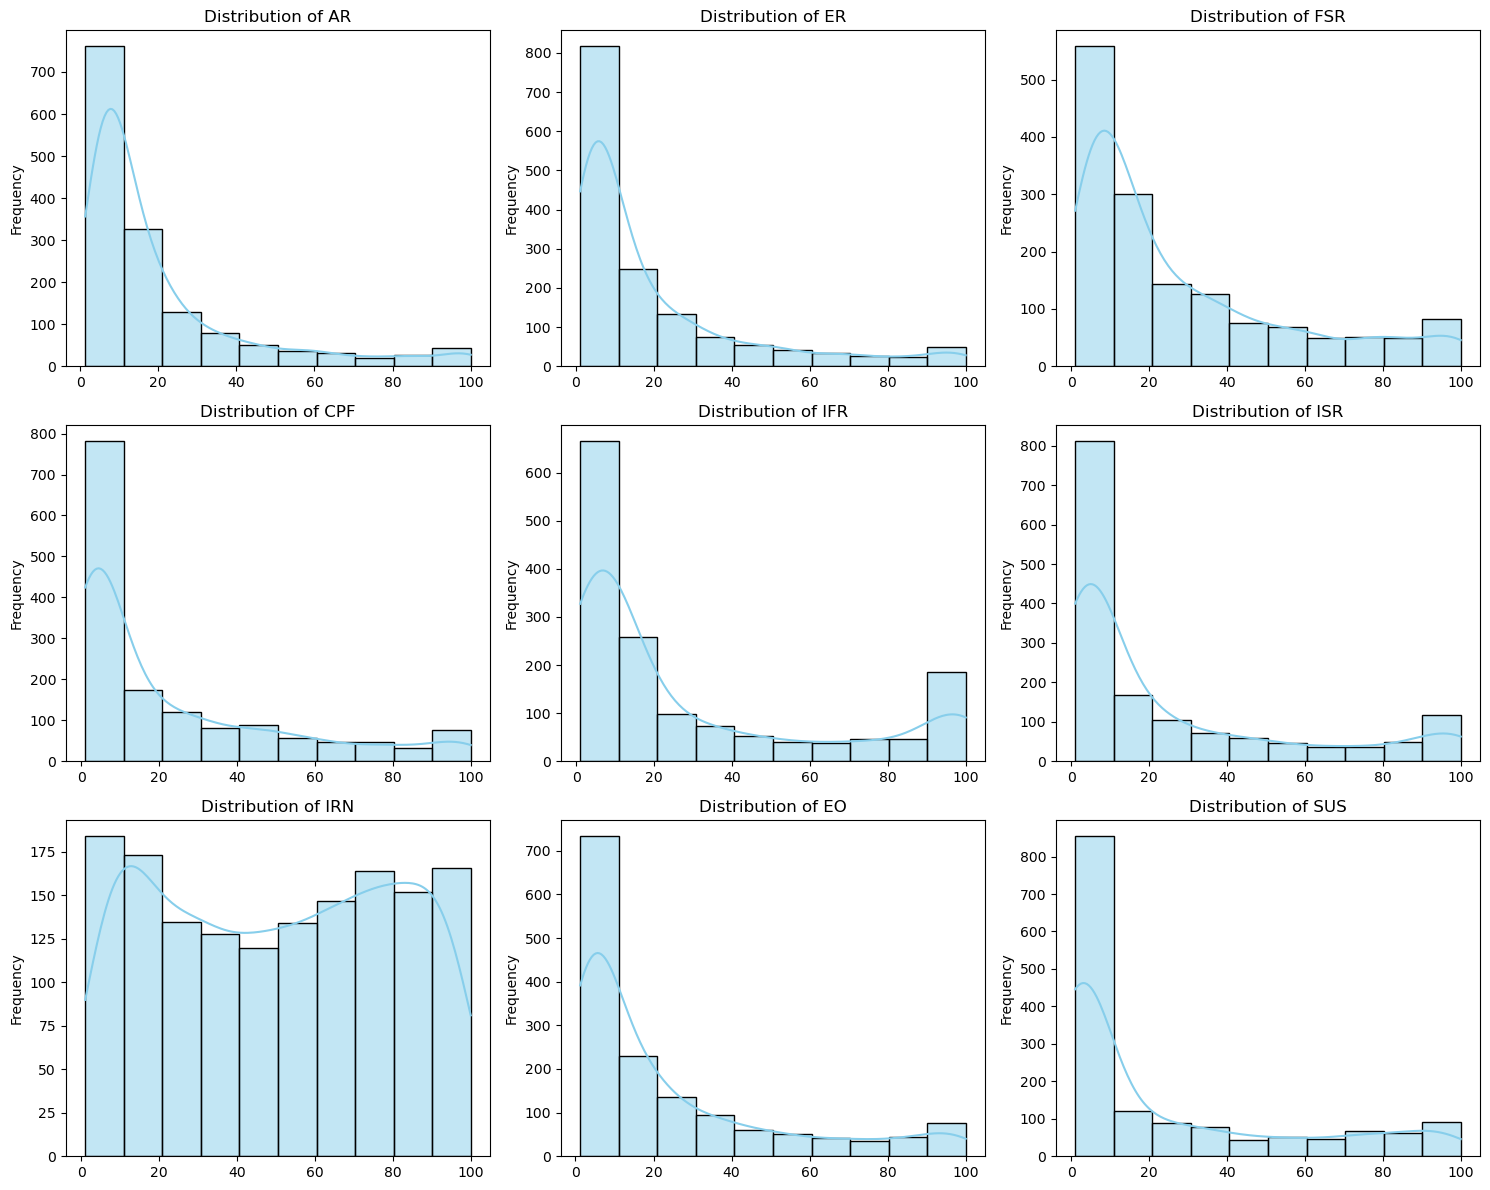

In [50]:
# 3x3 matrix of KDE + histogram plots
columns_to_plot = ['AR', 'ER', 'FSR', 'CPF', 'IFR', 'ISR', 'IRN', 'EO', 'SUS']

# Create the subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to make indexing easy

# Loop through each variable and plot
for i, col in enumerate(columns_to_plot):
    sns.histplot(df1[col], bins=10, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots (in case fewer than 9 variables)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

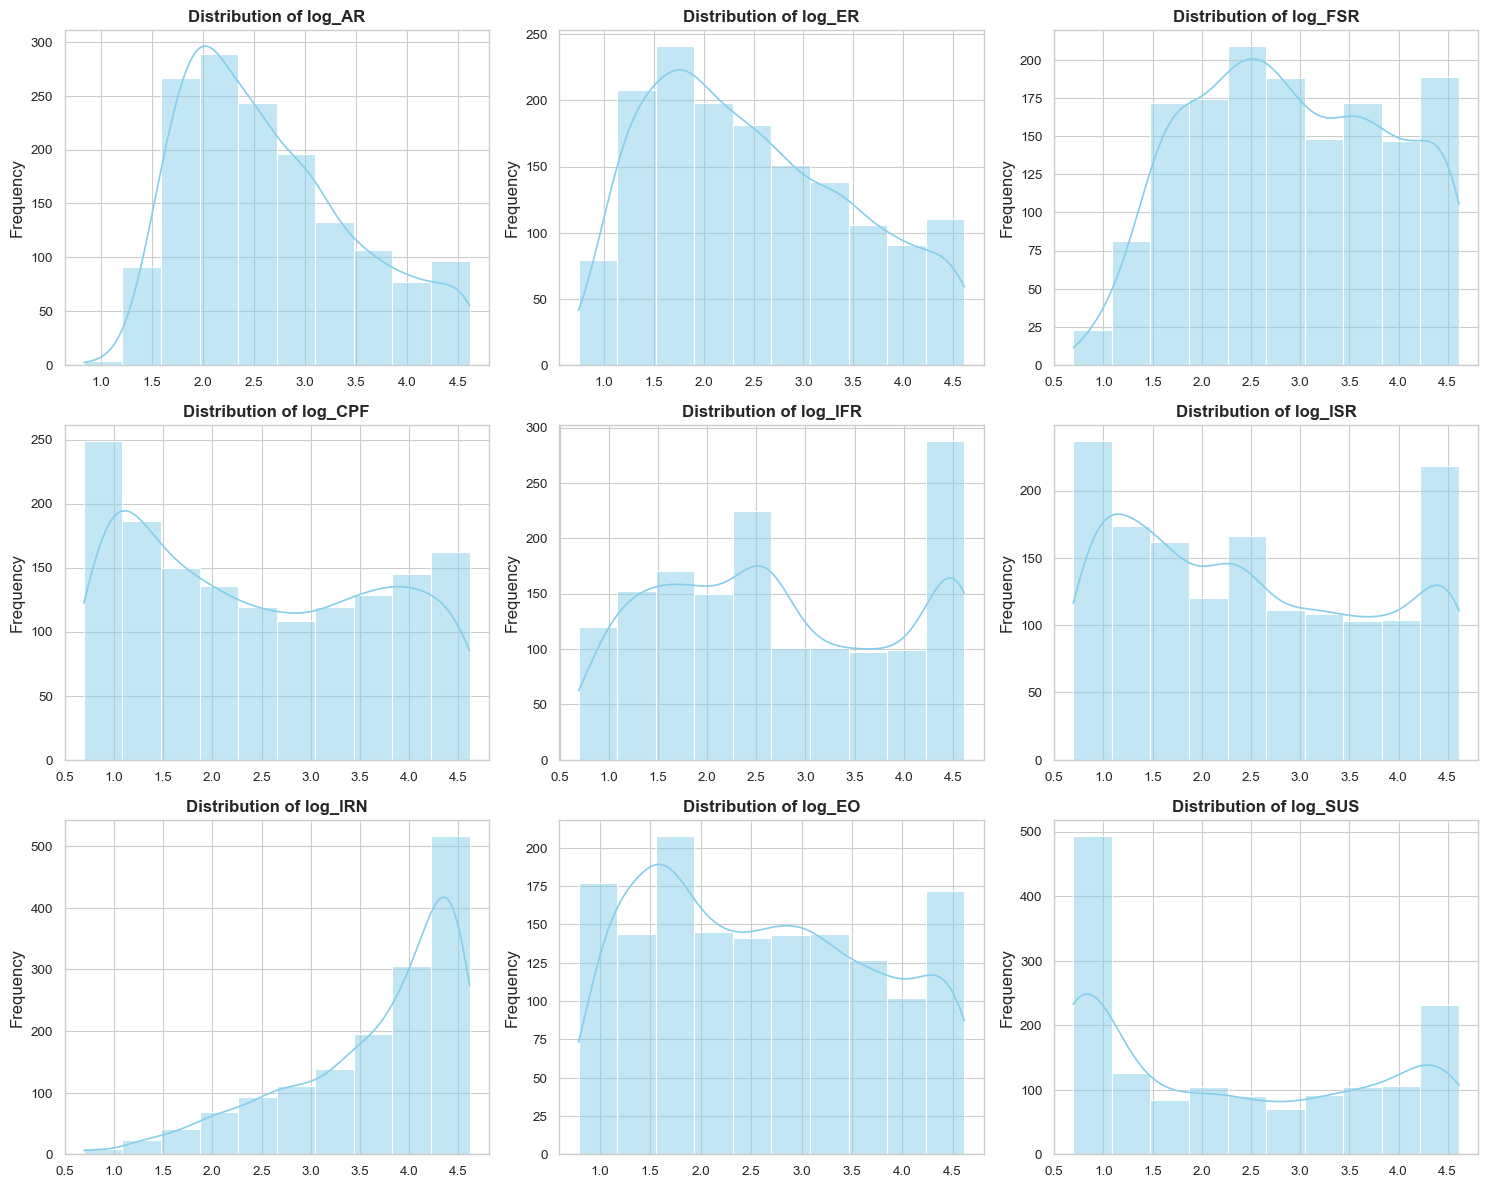

In [52]:
# Set publication-quality style settings
sns.set(style="whitegrid", context="paper", font_scale=1.1, 
        rc={"figure.figsize": (15, 12), "axes.titlesize": 14, "axes.labelsize": 12})

# Prepare the list of log-transformed variable names
columns_to_plot = [f'log_{col}' for col in features_to_log]

# Create a 3x3 subplot grid
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten the array for easy indexing

# Loop through each variable and plot its histogram with KDE
for i, col in enumerate(columns_to_plot):
    sns.histplot(data=df1, x=col, bins=10, kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('')  # Remove x-label to reduce clutter
    axes[i].set_ylabel('Frequency', fontsize=12)

# Remove any unused subplots (if there are fewer than 9 variables)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# Save the figure as a high-quality PDF
plt.savefig("log_transformed_histograms.pdf", format="pdf", bbox_inches="tight")
plt.show()

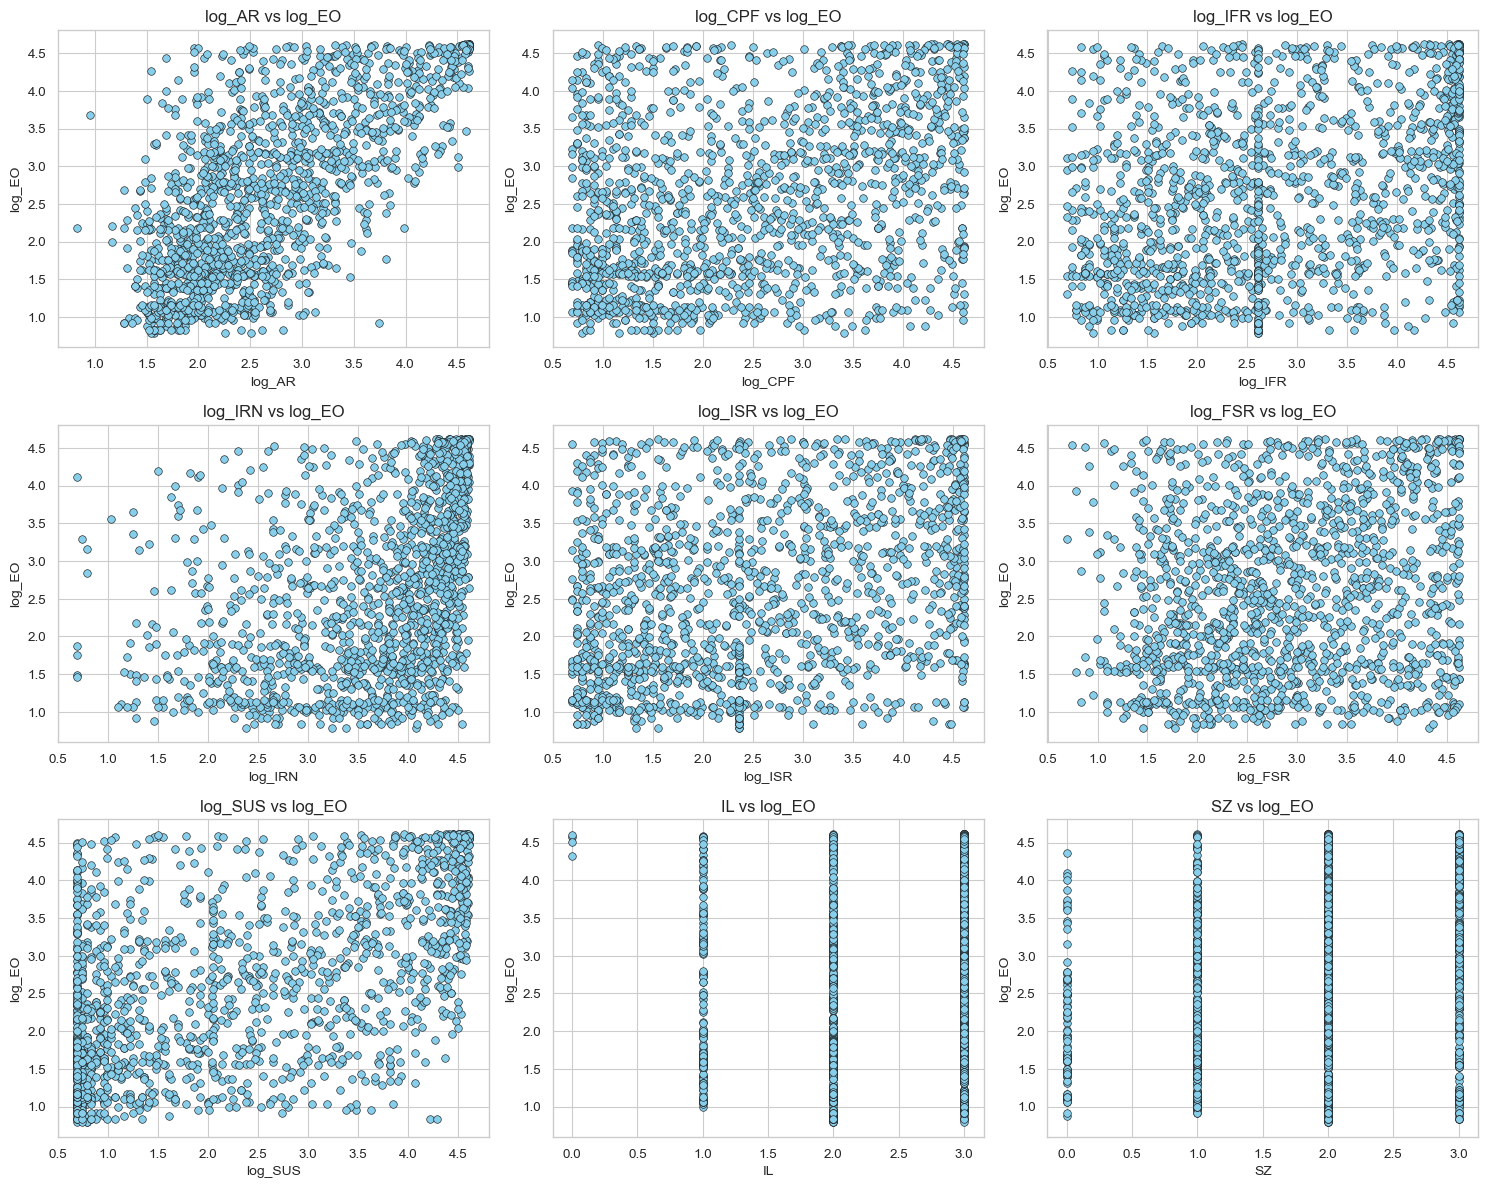

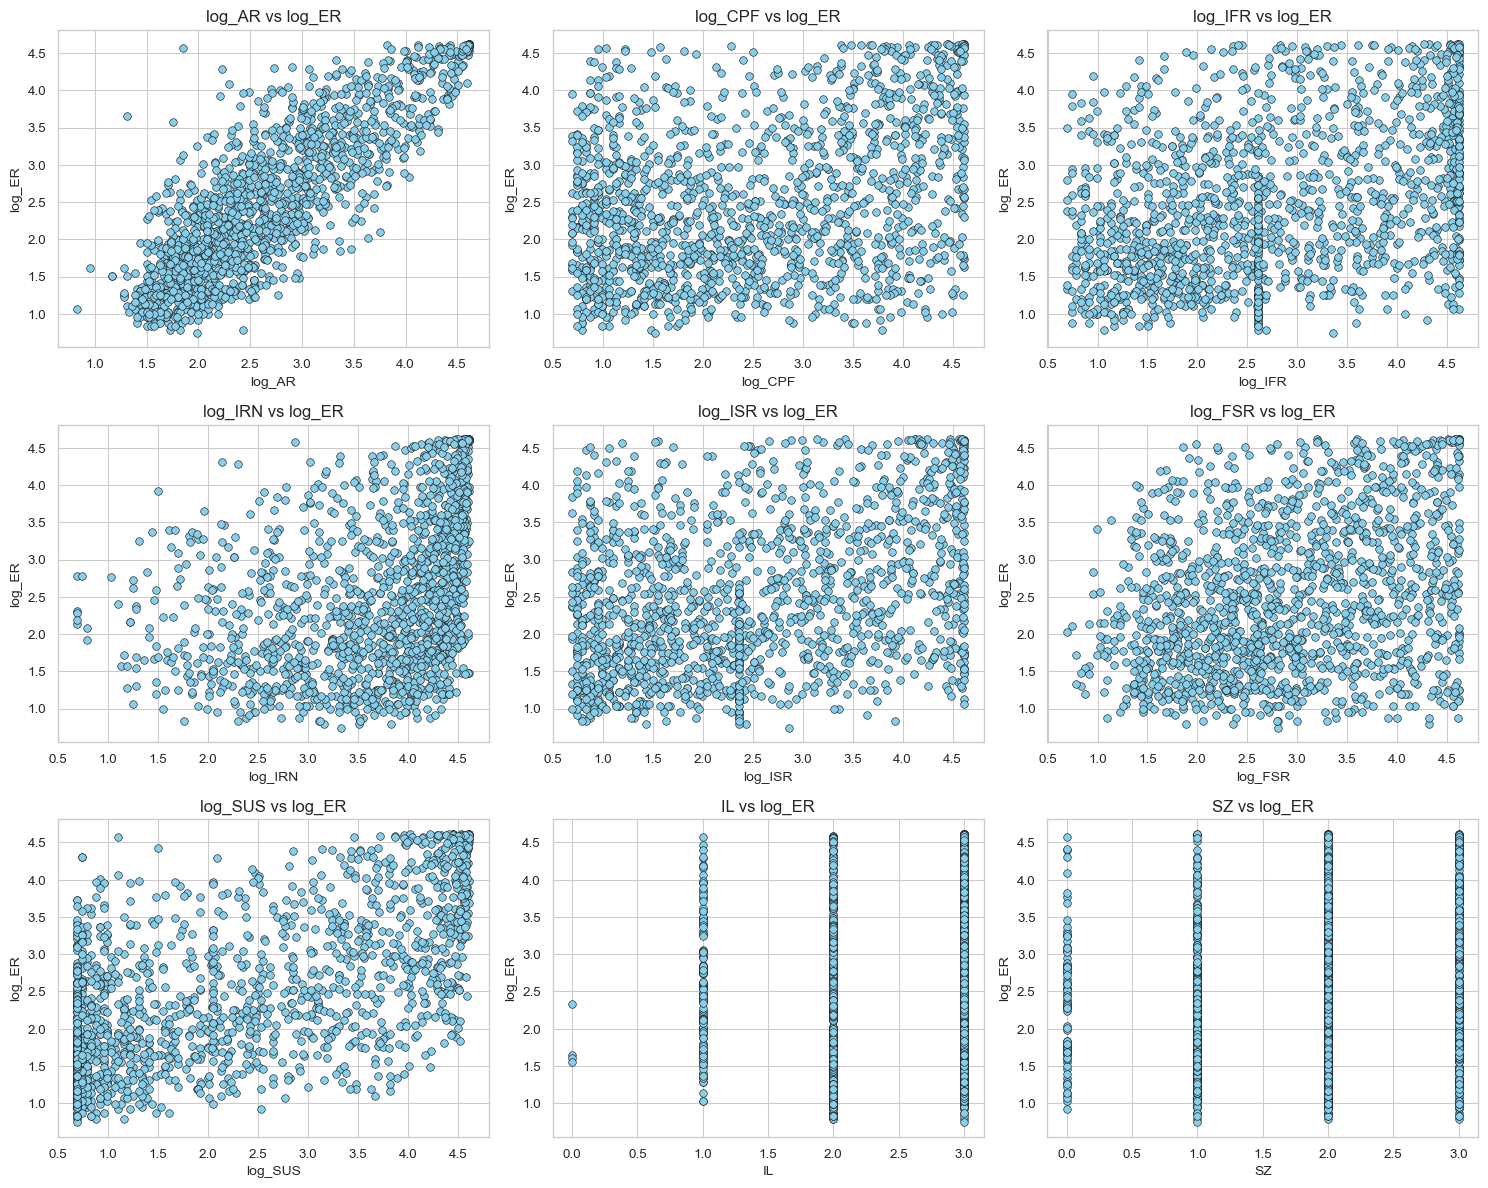

In [54]:
# Set style for a journal publication
sns.set(style="whitegrid", context="paper", font_scale=1.1)

# Define the variable mapping for reference
var_mapping = {
    "Academic Reputation": "AR",
    "Citations per Faculty": "CPF",
    "Employer Reputation": "ER",
    "Employment Outcomes": "EO",
    "International Faculty": "IFR",
    "International Research Network": "IRN",
    "International Students": "ISR",
    "Faculty Student": "FSR",
    "Sustainability": "SUS",
    "Size": "SZ",
    "Income_Level": "IL"
}

# For scatterplots, we use the logged version of a variable if available,
# except for IL and SZ (which are not logged).
# Independent variables (exclude ER and EO) will be plotted on the x-axis.
# For variables other than IL and SZ, we assume the logged column is named "log_<var>".
indep_codes = ['AR', 'CPF', 'IFR', 'IRN', 'ISR', 'FSR', 'SUS', 'IL', 'SZ']
indep_vars = [f'log_{var}' if var not in ['IL', 'SZ'] else var for var in indep_codes]

# Define the dependent variables for scatterplots.
# Both Employment Outcomes and Employer Reputation are logged.
dep_EO = 'log_EO'
dep_ER = 'log_ER'

# --- Scatterplots: Independent Variables vs Logged Employment Outcomes (EO) ---
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to index easily

for i, var in enumerate(indep_vars):
    sns.scatterplot(data=df1, x=var, y=dep_EO, ax=axes[i],
                    color='skyblue', edgecolor='k', s=30)
    axes[i].set_title(f'{var} vs {dep_EO}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel(dep_EO, fontsize=10)

# Remove any unused subplots (if any)
for j in range(len(indep_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('scatterplots_EO.pdf', format='pdf')
plt.show()

# --- Scatterplots: Independent Variables vs Logged Employer Reputation (ER) ---
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to index easily

for i, var in enumerate(indep_vars):
    sns.scatterplot(data=df1, x=var, y=dep_ER, ax=axes[i],
                    color='skyblue', edgecolor='k', s=30)
    axes[i].set_title(f'{var} vs {dep_ER}', fontsize=12)
    axes[i].set_xlabel(var, fontsize=10)
    axes[i].set_ylabel(dep_ER, fontsize=10)

# Remove any unused subplots (if any)
for j in range(len(indep_vars), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig('scatterplots_ER.pdf', format='pdf')
plt.show()

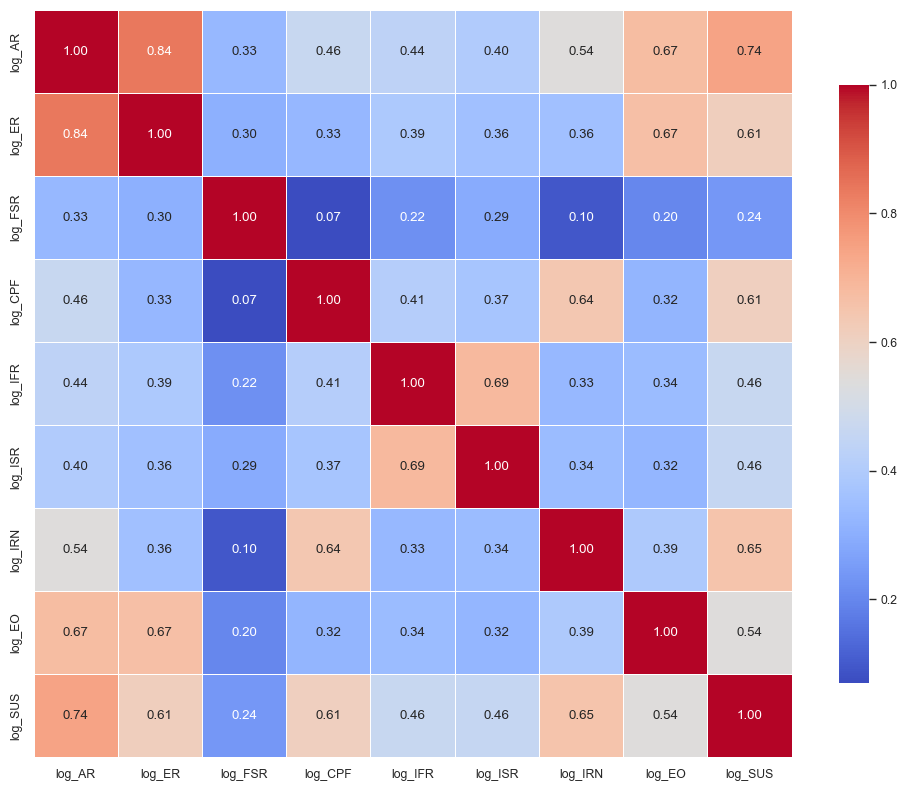

In [55]:
# Set academic publication style
sns.set(style="whitegrid", context="paper", font_scale=1,
        rc={"figure.figsize": (10, 8), "axes.titlesize": 14, "axes.labelsize": 14})

# Select only the logged variables (assuming they start with 'log_')
logged_columns = [col for col in df1.columns if col.startswith('log_')]

# Compute the correlation matrix of the logged variables
corr_matrix = df1[logged_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", 
                      linewidths=0.5, linecolor='white', cbar_kws={"shrink": 0.8})
plt.tight_layout()

# Save the heatmap as a PDF file
plt.savefig("correlation_heatmap.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [58]:
# Get upper triangle of the correlation matrix (excluding self-correlations)
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Flatten into long format
all_corr = corr_pairs.stack().reset_index()
all_corr.columns = ['v1', 'v2', 'corr']

# Round correlation values
all_corr['corr'] = all_corr['corr'].round(4)

# Sort by absolute correlation strength (descending)
all_corr_sorted = all_corr.reindex(all_corr['corr'].abs().sort_values(ascending=False).index)

# Display top results
print(all_corr_sorted)

         v1       v2    corr
0    log_AR   log_ER  0.8394
7    log_AR  log_SUS  0.7443
26  log_IFR  log_ISR  0.6852
6    log_AR   log_EO  0.6747
13   log_ER   log_EO  0.6682
34  log_IRN  log_SUS  0.6523
23  log_CPF  log_IRN  0.6441
14   log_ER  log_SUS  0.6146
25  log_CPF  log_SUS  0.6088
35   log_EO  log_SUS  0.5405
5    log_AR  log_IRN  0.5402
29  log_IFR  log_SUS  0.4647
2    log_AR  log_CPF  0.4632
32  log_ISR  log_SUS  0.4586
3    log_AR  log_IFR  0.4370
21  log_CPF  log_IFR  0.4099
4    log_AR  log_ISR  0.3985
33  log_IRN   log_EO  0.3906
10   log_ER  log_IFR  0.3870
22  log_CPF  log_ISR  0.3721
11   log_ER  log_ISR  0.3568
12   log_ER  log_IRN  0.3553
28  log_IFR   log_EO  0.3425
30  log_ISR  log_IRN  0.3420
27  log_IFR  log_IRN  0.3319
1    log_AR  log_FSR  0.3303
9    log_ER  log_CPF  0.3275
31  log_ISR   log_EO  0.3219
24  log_CPF   log_EO  0.3190
8    log_ER  log_FSR  0.3040
17  log_FSR  log_ISR  0.2919
20  log_FSR  log_SUS  0.2411
16  log_FSR  log_IFR  0.2208
19  log_FSR   

In [80]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# 1) Define features
base_features = [
    'log_AR', 'log_FSR', 'log_CPF', 'log_IFR',
    'log_ISR', 'log_IRN', 'log_SUS',
    'IL', 'SZ'
]
features_EO = base_features + ['log_ER']
features_ER = base_features + ['log_EO']

# 2) Single 80/20 split (by index) reused for both models
X_union = df1[list(set(features_EO + features_ER))]
_, _, idx_train, idx_test = train_test_split(
    X_union, df1.index,
    test_size=0.2, random_state=133
)

def get_X_y(df, target, features, train_idx, test_idx):
    X_tr = df.loc[train_idx, features]
    X_te = df.loc[test_idx, features]
    y_tr = df.loc[train_idx, target]
    y_te = df.loc[test_idx, target]
    return X_tr, X_te, y_tr, y_te

X_train_EO, X_test_EO, y_train_EO, y_test_EO = get_X_y(
    df1, 'log_EO', features_EO, idx_train, idx_test
)
X_train_ER, X_test_ER, y_train_ER, y_test_ER = get_X_y(
    df1, 'log_ER', features_ER, idx_train, idx_test
)

# 3) Desired variable order (for sorting tables)
sorted_features = [
    'Intercept', 'IL', 'SZ',
    'log_AR', 'log_ER', 'log_FSR', 'log_CPF',
    'log_IFR', 'log_ISR', 'log_IRN', 'log_EO', 'log_SUS'
]

In [82]:
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, r2_score
)

def get_stars(p):
    if p < 0.001: return '***'
    if p < 0.01:  return '**'
    if p < 0.05:  return '*'
    return 'ns'

def run_full_ols(name, X_train, X_test, y_train, y_test):
    # 1) Fit OLS with HC1 robust SEs
    X_tr = sm.add_constant(X_train)
    X_te = sm.add_constant(X_test)
    model = sm.OLS(y_train, X_tr).fit(cov_type='HC1')

    # 2) Predictions & performance
    y_tr_pred = model.predict(X_tr)
    y_te_pred = model.predict(X_te)

    mae_tr = mean_absolute_error(y_train, y_tr_pred)
    mae_te = mean_absolute_error(y_test,  y_te_pred)
    mse_tr = mean_squared_error(y_train, y_tr_pred)
    mse_te = mean_squared_error(y_test,  y_te_pred)
    rmse_tr = np.sqrt(mse_tr)
    rmse_te = np.sqrt(mse_te)

    adj_r2_tr = model.rsquared_adj
    r2_te     = r2_score(y_test, y_te_pred)
    adj_r2_te = 1 - (1 - r2_te) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    # 3) Build regression table manually
    params = model.params
    bse    = model.bse
    tvals  = model.tvalues
    pvals  = model.pvalues

    df_reg = pd.DataFrame({
        'Variable': params.index,
        'Coeff':    params.values,
        'Std_Error':bse.values,
        't':        tvals.values,
        'Sig':      pvals.values
    })
    df_reg['Variable']  = df_reg['Variable'].replace({'const':'Intercept'})
    df_reg['Coeff']     = df_reg['Coeff'].round(4)
    df_reg['Std_Error'] = df_reg['Std_Error'].round(4)
    df_reg['t']         = df_reg['t'].round(2)
    df_reg['Sig']       = df_reg['Sig'].round(4)
    df_reg['Stars']     = df_reg['Sig'].apply(get_stars)

    # 4) Sort by your custom order
    df_reg['SortKey'] = df_reg['Variable'].apply(
        lambda v: sorted_features.index(v) if v in sorted_features else 999
    )
    df_reg = df_reg.sort_values('SortKey').drop(columns='SortKey')

    # 5) Pack performance
    perf = {
        'Model':        name,
        'MAE_Train':    round(mae_tr,4),
        'MAE_Test':     round(mae_te,4),
        'MSE_Train':    round(mse_tr,4),
        'MSE_Test':     round(mse_te,4),
        'RMSE_Train':   round(rmse_tr,4),
        'RMSE_Test':    round(rmse_te,4),
        'Adj_R2_Train': round(adj_r2_tr,4),
        'Adj_R2_Test':  round(adj_r2_te,4)
    }

    return df_reg, perf

# ▶️ Run both models
table_eo, perf_eo = run_full_ols("EO", X_train_EO, X_test_EO, y_train_EO, y_test_EO)
table_er, perf_er = run_full_ols("ER", X_train_ER, X_test_ER, y_train_ER, y_test_ER)

perf_full = pd.DataFrame([perf_eo, perf_er])

# ✅ Print final outputs
print("EO Regression Table:\n", table_eo[['Variable','Coeff','Std_Error','t','Sig','Stars']])
print("\nER Regression Table:\n", table_er[['Variable','Coeff','Std_Error','t','Sig','Stars']])
print("\nModel Performance Summary:\n", perf_full)

EO Regression Table:
      Variable   Coeff  Std_Error     t     Sig Stars
0   Intercept  0.2411     0.1585  1.52  0.1283    ns
8          IL -0.0334     0.0485 -0.69  0.4914    ns
9          SZ  0.1138     0.0361  3.16  0.0016    **
1      log_AR  0.3016     0.0664  4.54  0.0000   ***
10     log_ER  0.4223     0.0480  8.79  0.0000   ***
2     log_FSR -0.0246     0.0277 -0.89  0.3743    ns
3     log_CPF -0.0053     0.0265 -0.20  0.8412    ns
4     log_IFR  0.0219     0.0280  0.78  0.4350    ns
5     log_ISR  0.0668     0.0287  2.33  0.0200     *
6     log_IRN  0.0324     0.0471  0.69  0.4924    ns
7     log_SUS  0.0536     0.0287  1.87  0.0615    ns

ER Regression Table:
      Variable   Coeff  Std_Error      t     Sig Stars
0   Intercept  0.5115     0.0959   5.33  0.0000   ***
8          IL -0.1378     0.0292  -4.72  0.0000   ***
9          SZ -0.1167     0.0240  -4.86  0.0000   ***
1      log_AR  0.9049     0.0316  28.66  0.0000   ***
2     log_FSR -0.0112     0.0174  -0.64  0.5203  

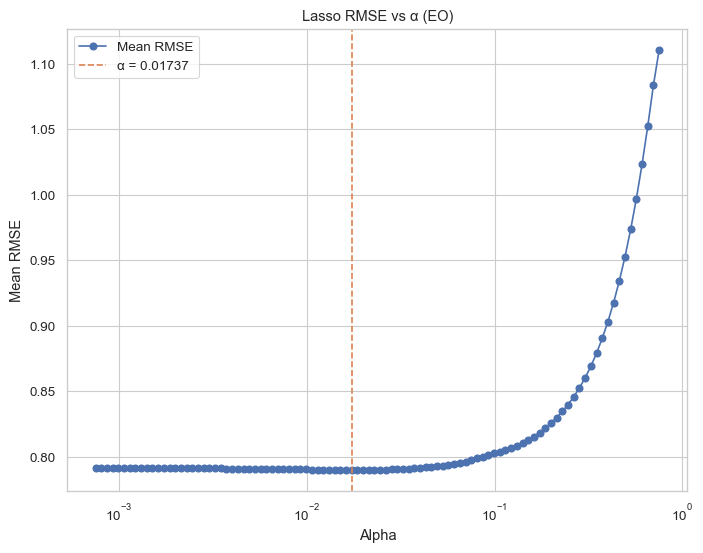

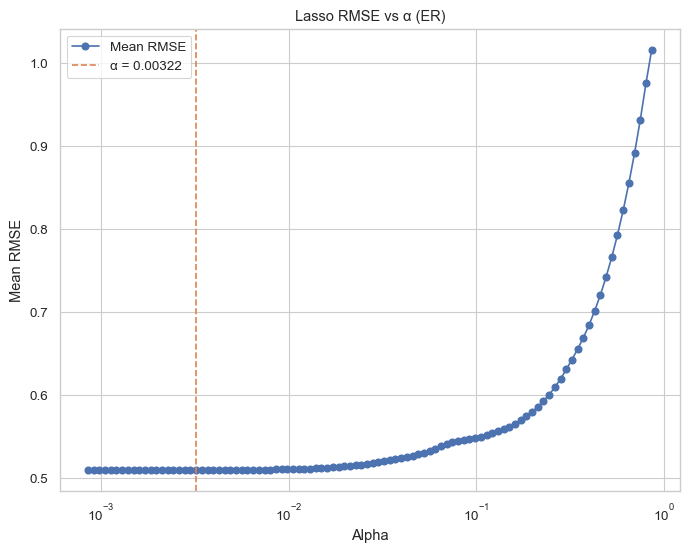

EO Reduced OLS:
     Variable   Coeff  StdErr       t      p Stars
0  Intercept  0.1230  0.1199   1.026  0.305    ns
6         SZ  0.1279  0.0316   4.052  0.000   ***
1     log_AR  0.2879  0.0613   4.695  0.000   ***
7     log_ER  0.4302  0.0424  10.152  0.000   ***
2    log_IFR  0.0226  0.0268   0.844  0.399    ns
3    log_ISR  0.0571  0.0259   2.203  0.028     *
4    log_IRN  0.0252  0.0373   0.677  0.499    ns
5    log_SUS  0.0481  0.0274   1.754  0.080    ns

ER Reduced OLS:
     Variable   Coeff  StdErr       t      p Stars
0  Intercept  0.5112  0.0958   5.336  0.000   ***
7         IL -0.1378  0.0257  -5.353  0.000   ***
8         SZ -0.1166  0.0227  -5.138  0.000   ***
1     log_AR  0.9048  0.0315  28.763  0.000   ***
2    log_FSR -0.0111  0.0172  -0.647  0.518    ns
3    log_CPF -0.0577  0.0175  -3.294  0.001    **
4    log_ISR  0.0412  0.0150   2.741  0.006    **
5    log_IRN -0.1112  0.0270  -4.115  0.000   ***
9     log_EO  0.1754  0.0180   9.766  0.000   ***
6    log_SUS  0

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

# reuse get_stars from Cell 2

def run_lasso_then_ols_with_plot(
    name, X_train, X_test, y_train, y_test,
    sorted_features, cv=5, max_iter=10000
):
    # 1) Fit LassoCV (with scaling)
    pipe = make_pipeline(
        StandardScaler(),
        LassoCV(cv=cv, max_iter=max_iter)
    )
    pipe.fit(X_train, y_train)
    lasso = pipe.named_steps['lassocv']
    alpha_opt = lasso.alpha_

    # 2) Plot RMSE vs alpha
    alphas    = lasso.alphas_
    rmse_mean = np.sqrt(lasso.mse_path_.mean(axis=1))
    plt.figure(figsize=(8,6))
    plt.plot(alphas, rmse_mean, marker='o', label='Mean RMSE')
    plt.xscale('log')
    plt.axvline(alpha_opt, color='C1', linestyle='--',
                label=f'α = {alpha_opt:.5f}')
    plt.xlabel('Alpha')
    plt.ylabel('Mean RMSE')
    plt.title(f'Lasso RMSE vs α ({name})')
    plt.legend()
    plt.show()

    # 3) Select non-zero features
    coefs    = pd.Series(lasso.coef_, index=X_train.columns)
    selected = coefs[coefs != 0].index.tolist()

    # 4) Refit OLS on selected features
    X_tr_sel = sm.add_constant(X_train[selected])
    ols      = sm.OLS(y_train, X_tr_sel).fit()
    params   = ols.params
    bse      = ols.bse
    tvals    = ols.tvalues
    pvals    = ols.pvalues

    df_ols = pd.DataFrame({
        'Variable': params.index,
        'Coeff':    params.values.round(4),
        'StdErr':   bse.values.round(4),
        't':        tvals.values.round(3),
        'p':        pvals.values.round(3),
        'Stars':    [get_stars(p) for p in pvals]
    })
    df_ols['Variable'] = df_ols['Variable'].replace({'const':'Intercept'})
    df_ols['SortKey']  = df_ols['Variable'].apply(
        lambda v: sorted_features.index(v) if v in sorted_features else 999
    )
    df_ols = df_ols.sort_values('SortKey').drop(columns='SortKey')

    # 5) Performance
    y_tr_pred   = ols.predict(X_tr_sel)
    X_te_sel    = sm.add_constant(X_test[selected], has_constant='add')
    y_te_pred   = ols.predict(X_te_sel)
    mae_tr      = mean_absolute_error(y_train, y_tr_pred)
    mae_te      = mean_absolute_error(y_test,  y_te_pred)
    mse_tr      = mean_squared_error(y_train, y_tr_pred)
    mse_te      = mean_squared_error(y_test,  y_te_pred)

    perf = {
        'Model':        f"ReducedOLS_{name}",
        'Alpha_Lasso':  round(alpha_opt,5),
        'n_features':   len(selected),
        'MAE_Train':    round(mae_tr,4),
        'MAE_Test':     round(mae_te,4),
        'MSE_Train':    round(mse_tr,4),
        'MSE_Test':     round(mse_te,4),
        'RMSE_Train':   round(np.sqrt(mse_tr),4),
        'RMSE_Test':    round(np.sqrt(mse_te),4),
        'Adj_R2_Train': round(ols.rsquared_adj,4),
        'Adj_R2_Test':  '-'
    }

    # Return also the list of selected features
    return df_ols, perf, selected

# ▶️ Run for EO and ER, capturing selected features
rt_eo, perf_eo, selected_EO = run_lasso_then_ols_with_plot(
    "EO", X_train_EO, X_test_EO, y_train_EO, y_test_EO, sorted_features
)
rt_er, perf_er, selected_ER = run_lasso_then_ols_with_plot(
    "ER", X_train_ER, X_test_ER, y_train_ER, y_test_ER, sorted_features
)

# Build reduced design matrices for Cell 4
X_train_EO_reduced = X_train_EO[selected_EO]
X_test_EO_reduced  = X_test_EO[selected_EO]
X_train_ER_reduced = X_train_ER[selected_ER]
X_test_ER_reduced  = X_test_ER[selected_ER]

perf_lasso = pd.DataFrame([perf_eo, perf_er])

# ✅ Display reduced‐OLS tables & performance
print("EO Reduced OLS:\n", rt_eo[['Variable','Coeff','StdErr','t','p','Stars']])
print("\nER Reduced OLS:\n", rt_er[['Variable','Coeff','StdErr','t','p','Stars']])
print("\nLasso→OLS Performance:\n", perf_lasso)

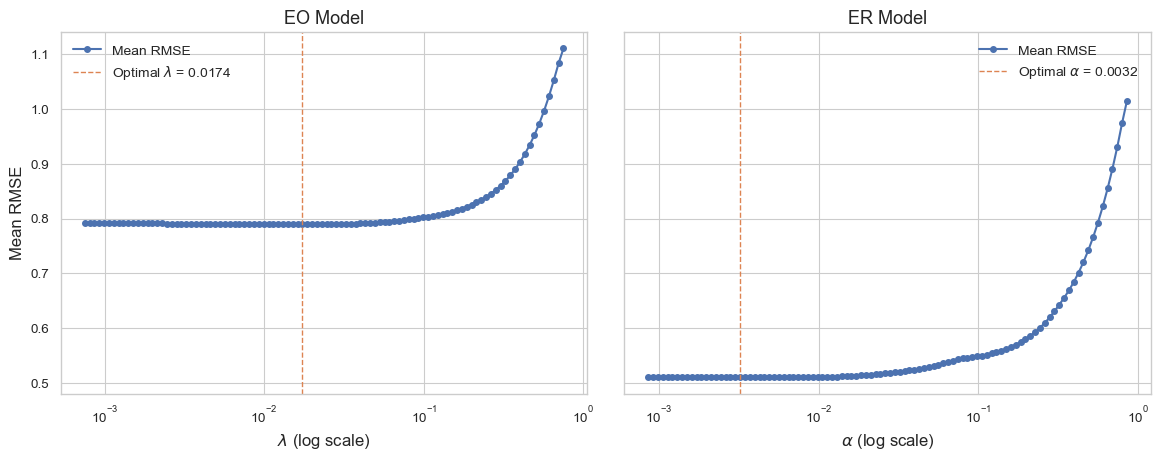

In [86]:
# Cell 4: Publication‑ready Lasso RMSE vs regularization parameter plots

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# Try seaborn styling; if seaborn is not installed, fallback to 'ggplot'
try:
    import seaborn as sns
    sns.set_theme(style='whitegrid', context='paper', font_scale=1.1)
except ImportError:
    plt.style.use('ggplot')

def get_lasso_path(X_train, y_train, cv=5, max_iter=10000):
    """
    Fit LassoCV and return (alphas, mean_rmse, optimal_alpha).
    """
    pipe = make_pipeline(
        StandardScaler(),
        LassoCV(cv=cv, max_iter=max_iter)
    )
    pipe.fit(X_train, y_train)
    lasso = pipe.named_steps['lassocv']
    alphas    = lasso.alphas_
    rmse_mean = np.sqrt(lasso.mse_path_.mean(axis=1))
    alpha_opt = lasso.alpha_
    return alphas, rmse_mean, alpha_opt

# Compute paths for EO (λ) and ER (α)
eo_alphas, eo_rmse, eo_lambda = get_lasso_path(X_train_EO, y_train_EO)
er_alphas, er_rmse, er_alpha  = get_lasso_path(X_train_ER, y_train_ER)

# Plot side‑by‑side
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# EO panel: λ vs RMSE
axes[0].plot(eo_alphas, eo_rmse,
             marker='o', markersize=4, linewidth=1.5,
             label='Mean RMSE', color='C0')
axes[0].axvline(eo_lambda, color='C1', linestyle='--', linewidth=1,
               label=fr'Optimal $\lambda$ = {eo_lambda:.4f}')
axes[0].set_xscale('log')
axes[0].set_xlabel(r'$\lambda$ (log scale)', fontsize=12)
axes[0].set_ylabel('Mean RMSE', fontsize=12)
axes[0].set_title('EO Model', fontsize=13)
axes[0].legend(frameon=False, fontsize=10)

# ER panel: α vs RMSE
axes[1].plot(er_alphas, er_rmse,
             marker='o', markersize=4, linewidth=1.5,
             label='Mean RMSE', color='C0')
axes[1].axvline(er_alpha, color='C1', linestyle='--', linewidth=1,
               label=fr'Optimal $\alpha$ = {er_alpha:.4f}')
axes[1].set_xscale('log')
axes[1].set_xlabel(r'$\alpha$ (log scale)', fontsize=12)
axes[1].set_title('ER Model', fontsize=13)
axes[1].legend(frameon=False, fontsize=10)

# Layout adjustments & save
fig.tight_layout(pad=2.0)
fig.savefig('lasso_rmse_vs_param.pdf', dpi=1200)
plt.show()

# Robustness

In [89]:
# Full models
model_eo = sm.OLS(y_train_EO, sm.add_constant(X_train_EO)).fit()
model_er = sm.OLS(y_train_ER, sm.add_constant(X_train_ER)).fit()

# Reduced models
model_eo_reduced = sm.OLS(y_train_EO, sm.add_constant(X_train_EO_reduced)).fit()
model_er_reduced = sm.OLS(y_train_ER, sm.add_constant(X_train_ER_reduced)).fit()

In [91]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

models = {
    "EO": model_eo,
    "ER": model_er,
    "EO_Reduced": model_eo_reduced,
    "ER_Reduced": model_er_reduced
}

for name, model in models.items():
    X = model.model.exog
    features = model.model.exog_names
    vif_df = pd.DataFrame({
        'Variable': features,
        'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
    })
    print(f"\n📊 VIF for {name}")
    print(vif_df)


📊 VIF for EO
   Variable        VIF
0     const  44.780158
1    log_AR   5.595306
2   log_FSR   1.380485
3   log_CPF   2.273191
4   log_IFR   2.069665
5   log_ISR   2.257431
6   log_IRN   2.702774
7   log_SUS   3.269691
8        IL   1.418835
9        SZ   1.827264
10   log_ER   3.789542

📊 VIF for ER
   Variable        VIF
0     const  43.847100
1    log_AR   3.387628
2   log_FSR   1.380978
3   log_CPF   2.252952
4   log_IFR   2.070805
5   log_ISR   2.258268
6   log_IRN   2.666224
7   log_SUS   3.239957
8        IL   1.386332
9        SZ   1.803400
10   log_EO   1.884916

📊 VIF for EO_Reduced
  Variable        VIF
0    const  27.986545
1   log_AR   5.264679
2  log_IFR   2.043390
3  log_ISR   2.022905
4  log_IRN   2.109629
5  log_SUS   2.959894
6       SZ   1.430371
7   log_ER   3.639388

📊 VIF for ER_Reduced
  Variable        VIF
0    const  42.978785
1   log_AR   3.334132
2  log_FSR   1.378017
3  log_CPF   2.234522
4  log_ISR   1.638153
5  log_IRN   2.665957
6  log_SUS   3.231686
7 

In [93]:
from statsmodels.stats.diagnostic import het_breuschpagan

for name, model in models.items():
    lm_stat, lm_pval, f_stat, f_pval = het_breuschpagan(model.resid, model.model.exog)
    print(f"\n Breusch-Pagan Test for {name}")
    print(f"LM stat: {lm_stat:.4f}, p-value: {lm_pval:.4f} | F stat: {f_stat:.4f}, p-value: {f_pval:.4f}")


 Breusch-Pagan Test for EO
LM stat: 74.6972, p-value: 0.0000 | F stat: 7.8918, p-value: 0.0000

 Breusch-Pagan Test for ER
LM stat: 36.0346, p-value: 0.0001 | F stat: 3.6808, p-value: 0.0001

 Breusch-Pagan Test for EO_Reduced
LM stat: 28.0888, p-value: 0.0002 | F stat: 4.0813, p-value: 0.0002

 Breusch-Pagan Test for ER_Reduced
LM stat: 35.8161, p-value: 0.0000 | F stat: 4.0677, p-value: 0.0000


In [95]:
from statsmodels.stats.stattools import durbin_watson

for name, model in models.items():
    dw = durbin_watson(model.resid)
    print(f"\n🔁 Durbin-Watson for {name}: {dw:.4f}")


🔁 Durbin-Watson for EO: 2.0016

🔁 Durbin-Watson for ER: 1.9811

🔁 Durbin-Watson for EO_Reduced: 1.9970

🔁 Durbin-Watson for ER_Reduced: 1.9813


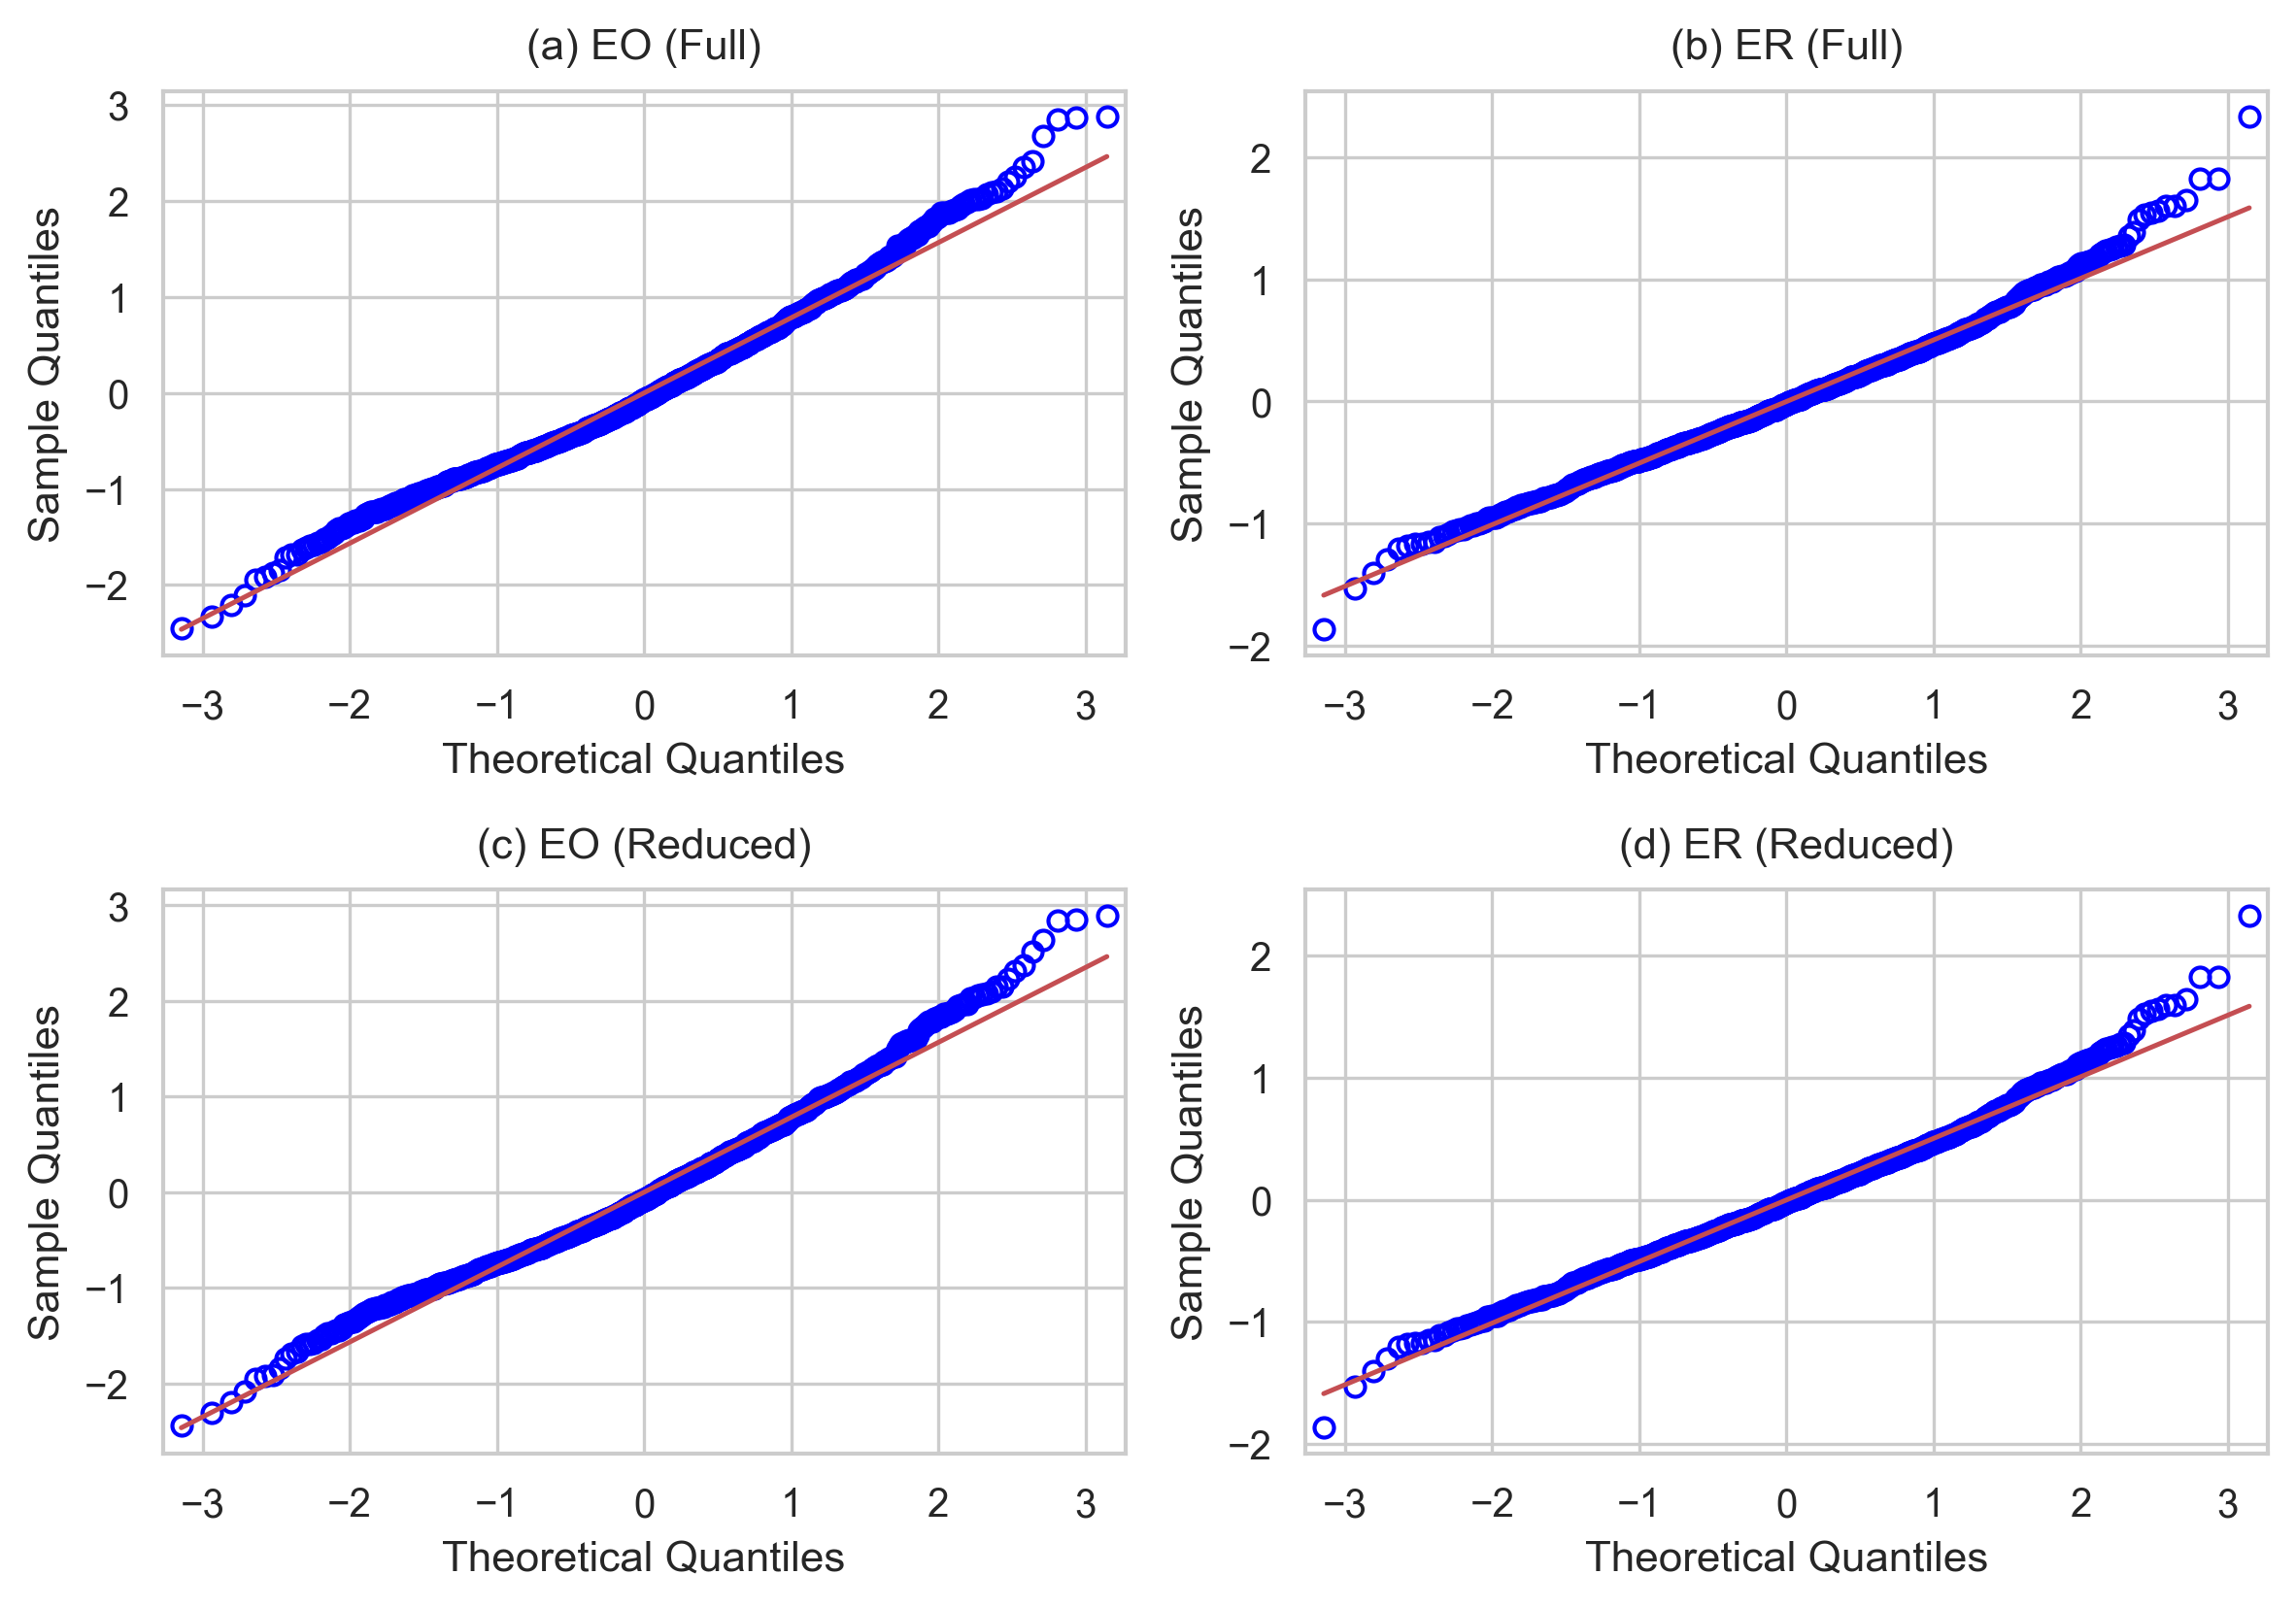

In [113]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Models to plot
model_dict = {
    "EO (Full)":    model_eo,
    "ER (Full)":    model_er,
    "EO (Reduced)": model_eo_reduced,
    "ER (Reduced)": model_er_reduced
}

# Create figure
fig, axes = plt.subplots(2, 2, figsize=(8, 6), dpi=300)
axes = axes.flatten()

# QQ‐plots
for idx, ((name, model), ax) in enumerate(zip(model_dict.items(), axes)):
    qqplot(model.resid, line='s', ax=ax,
           marker='o', markerfacecolor='none', markeredgecolor='blue')
    ax.set_title(f'({chr(97+idx)}) {name}', fontweight='normal', pad=8)
    ax.set_xlabel('Theoretical Quantiles', fontweight='normal')
    ax.set_ylabel('Sample Quantiles', fontweight='normal')

# Adjust layout
fig.tight_layout(rect=[0, 0, 1, 0.94])

# Save figure
fig.savefig('qq_plots_residuals.pdf', dpi=300, bbox_inches='tight')
# Or, for PNG:
# fig.savefig('qq_plots_residuals.png', dpi=300, bbox_inches='tight')

plt.show()

# K-Fold

In [99]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LassoCV, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import KFold

# ============================
# Define k-fold CV functions
# ============================

def cv_ols(X, y, k=5):
    """
    Perform k-fold CV for an OLS regression model using statsmodels.
    Returns average MAE, MSE, and RMSE across folds.
    """
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mae_list, mse_list, rmse_list = [], [], []
    
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        
        # Add constant for intercept
        X_train_cv_const = sm.add_constant(X_train_cv)
        X_test_cv_const = sm.add_constant(X_test_cv)
        
        # Fit OLS with robust SEs (HC1)
        model = sm.OLS(y_train_cv, X_train_cv_const).fit(cov_type='HC1')
        y_pred = model.predict(X_test_cv_const)
        
        mae_list.append(mean_absolute_error(y_test_cv, y_pred))
        mse_fold = mean_squared_error(y_test_cv, y_pred)
        mse_list.append(mse_fold)
        rmse_list.append(np.sqrt(mse_fold))
        
    return {'MAE': np.mean(mae_list), 
            'MSE': np.mean(mse_list), 
            'RMSE': np.mean(rmse_list)}

def cv_lasso(X, y, k=5):
    """
    Perform k-fold CV for a Lasso regression model.
    First, LassoCV is used on the entire dataset to obtain the optimal alpha.
    Then, using that optimal alpha, a manual k-fold CV is performed.
    Returns the best alpha (rounded to 5 decimals) along with average MAE, MSE, and RMSE.
    """
    # Use LassoCV to obtain the optimal alpha over a continuous grid.
    lasso_cv = LassoCV(cv=k, max_iter=10000, alphas=None, random_state=42)
    pipeline_cv = make_pipeline(StandardScaler(), lasso_cv)
    pipeline_cv.fit(X, y)
    best_alpha = round(lasso_cv.alpha_, 5)
    
    # Perform manual k-fold CV with Lasso using the best alpha
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    mae_list, mse_list, rmse_list = [], [], []
    
    for train_index, test_index in kf.split(X):
        X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
        y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
        
        pipeline = make_pipeline(StandardScaler(), Lasso(alpha=best_alpha, max_iter=10000))
        pipeline.fit(X_train_cv, y_train_cv)
        y_pred = pipeline.predict(X_test_cv)
        
        mae_list.append(mean_absolute_error(y_test_cv, y_pred))
        mse_fold = mean_squared_error(y_test_cv, y_pred)
        mse_list.append(mse_fold)
        rmse_list.append(np.sqrt(mse_fold))
    
    return {'Best_Alpha': best_alpha,
            'MAE': np.mean(mae_list), 
            'MSE': np.mean(mse_list), 
            'RMSE': np.mean(rmse_list)}

# ======================================
# Assuming these datasets are defined:
# X_train_EO, y_train_EO, X_train_ER, y_train_ER
# and for reduced features:
# X_train_EO_reduced, X_train_ER_reduced
# (Typically these would be your full datasets or training data.)
# ======================================

# Example: if using full training datasets from your previous split:
# (If you instead have X_EO and y_EO for the entire sample, use those.)
# Here we assume the train sets are used for k-fold CV.

# -------------------------------------
# Full Models: EO and ER using OLS
# -------------------------------------
cv_results_EO = cv_ols(X_train_EO, y_train_EO, k=5)
cv_results_ER = cv_ols(X_train_ER, y_train_ER, k=5)

# -------------------------------------
# Reduced Models: EO_Reduced and ER_Reduced using Lasso with optimal alpha
# -------------------------------------
cv_results_EO_reduced = cv_lasso(X_train_EO_reduced, y_train_EO, k=5)
cv_results_ER_reduced = cv_lasso(X_train_ER_reduced, y_train_ER, k=5)

# Combine results into a summary dataframe
cv_summary = pd.DataFrame({
    'Model': ['EO', 'ER', 'EO_Reduced', 'ER_Reduced'],
    'MAE': [cv_results_EO['MAE'], cv_results_ER['MAE'], cv_results_EO_reduced['MAE'], cv_results_ER_reduced['MAE']],
    'MSE': [cv_results_EO['MSE'], cv_results_ER['MSE'], cv_results_EO_reduced['MSE'], cv_results_ER_reduced['MSE']],
    'RMSE': [cv_results_EO['RMSE'], cv_results_ER['RMSE'], cv_results_EO_reduced['RMSE'], cv_results_ER_reduced['RMSE']]
})

# Optionally, include the optimal alphas for the reduced models in the summary
cv_summary['Best_Alpha'] = ['-', '-', cv_results_EO_reduced['Best_Alpha'], cv_results_ER_reduced['Best_Alpha']]

# ---------------------------
# Print the cross-validation summary
# ---------------------------
print("📊 5-Fold Cross Validation Results:")
print(cv_summary)

📊 5-Fold Cross Validation Results:
        Model       MAE       MSE      RMSE Best_Alpha
0          EO  0.626483  0.621774  0.788180          -
1          ER  0.399184  0.260317  0.508809          -
2  EO_Reduced  0.625823  0.620176  0.787201    0.00131
3  ER_Reduced  0.399050  0.259615  0.508100    0.00198
